In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# all columns are numerical (categorical columns have been converted)
#df = pd.read_csv('df.csv')
#df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [3]:
# for predicting shipping on time and late delivery 
df = pd.read_csv('df_ontime_vs_late.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df = df.drop(columns=[
    'Late_delivery_risk'
], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172762 entries, 0 to 172761
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           172762 non-null  object 
 1   Days for shipment (scheduled)  172762 non-null  int64  
 2   Sales per customer             172762 non-null  float64
 3   Delivery Status                172762 non-null  object 
 4   Customer Segment               172762 non-null  object 
 5   Customer Zipcode               172762 non-null  float64
 6   Department Id                  172762 non-null  int64  
 7   Department Name                172762 non-null  object 
 8   Latitude                       172762 non-null  float64
 9   Longitude                      172762 non-null  float64
 10  Market                         172762 non-null  object 
 11  Order Item Discount            172762 non-null  float64
 12  Order Item Discount Rate      

In [6]:
df_obj = df.select_dtypes(include='object')
df_obj.drop(columns=['Delivery Status'], axis=1, inplace=True)

In [7]:
#one hot encoder
def onehotencoder(col):
    
    ohe = OneHotEncoder()
    ohe_array = ohe.fit_transform((pd.DataFrame(col))).toarray()

    feature_labels = np.array(ohe.categories_).ravel()


    df_obj = pd.DataFrame(ohe_array, columns=feature_labels)
    
    return df_obj

In [8]:
df_ohe = pd.DataFrame()
for c in df_obj.columns:
    one_hot = onehotencoder(df_obj[c])
    df_ohe = pd.concat([df_ohe, one_hot], axis=1) 

In [9]:
df_cont_var = df.select_dtypes(exclude='object')

In [10]:
df_ohe = pd.concat([df_cont_var, df_ohe], axis=1)

In [11]:
df_ohe = pd.concat([df_ohe, df['Delivery Status'] ], axis=1)

In [12]:
df=df_ohe

In [13]:
#svm is taking a long time to run so I will randomly select data to use
# for training and testing to save time and get a general sense of the 
#model's accuracy
df = df.sample(frac = .5)


In [14]:
# y variable values set equal to label encode the dataframes column being used for y
le = LabelEncoder()
y = le.fit_transform(df['Delivery Status'])

In [15]:
# x variable
X = df.drop(columns=['Delivery Status'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

### Support Vector Machine Model

In [17]:
# scaling data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
scaler_x_train = scaler.transform(X_train)
scaler_x_test = scaler.transform(X_test)

In [19]:
svc = SVC()
svc.fit(scaler_x_train, y_train)
svc_pred_train = svc.predict(scaler_x_train)

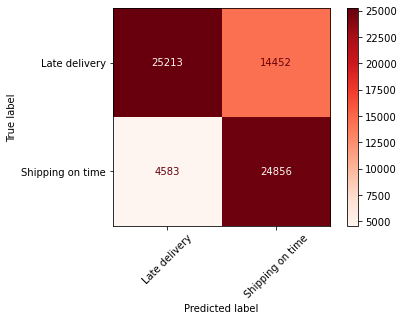

In [20]:
plot_confusion_matrix(svc, scaler_x_train, y_train,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, rotation=45)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [21]:
print(classification_report(y_train, svc_pred_train, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.85      0.64      0.73     39665
Shipping on time       0.63      0.84      0.72     29439

        accuracy                           0.72     69104
       macro avg       0.74      0.74      0.72     69104
    weighted avg       0.76      0.72      0.72     69104



In [22]:
svc_pred_test = svc.predict(scaler_x_test)

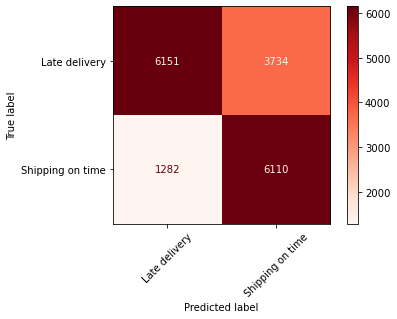

In [23]:
plot_confusion_matrix(svc, scaler_x_test, y_test,
                      cmap=plt.cm.Reds)

plt.xticks(ticks=range(0,len(le.classes_)),labels=le.classes_, rotation=45)
plt.yticks(ticks=range(0,len(le.classes_)),labels=le.classes_)

plt.show()

In [24]:
print(classification_report(y_test, svc_pred_test, target_names=le.classes_))

                  precision    recall  f1-score   support

   Late delivery       0.83      0.62      0.71      9885
Shipping on time       0.62      0.83      0.71      7392

        accuracy                           0.71     17277
       macro avg       0.72      0.72      0.71     17277
    weighted avg       0.74      0.71      0.71     17277



In [25]:
#.61 before removing column for high correlaiton
#.62 after removing high corr column

In [26]:
#.61 before delivery status change
# .71 after delivery status change to only late delivery and shipping on time